In [1]:
##This project is about 'ecommerce customer data' dataset
##The motive of this project is  understand customer purchasing behavior 

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [151]:
df=pd.read_csv('ecommerce_customer_data_large1.csv')
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,03-05-2023 21:30,Home,177,1,177,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,16-05-2021 13:57,Electronics,174,3,522,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,13-07-2020 06:16,Books,413,1,413,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,17-01-2023 13:14,Electronics,396,3,1188,Cash,31,0.0,John Rivera,31,Female,0
4,44605,01-05-2021 11:29,Books,259,4,1036,PayPal,31,1.0,John Rivera,31,Female,0


In [147]:
df.columns

Index(['Customer ID', 'Purchase Date', 'Product Category', 'Product Price',
       'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age',
       'Returns', 'Customer Name', 'Age', 'Gender', 'Churn'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [5]:
df.shape

(250000, 13)

In [6]:
df.isna().sum()

Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

In [7]:
df.describe()

,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Age,Churn
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,202618.000000,250000.000000,250000.00000
mean,25017.632092,254.742724,3.004936,765.954660,43.798276,0.500824,43.798276,0.20052
std,14412.515718,141.738104,1.414737,593.494204,15.364915,0.500001,15.364915,0.40039
min,1.000000,10.000000,1.000000,10.000000,18.000000,0.000000,18.000000,0.00000
25%,12590.000000,132.000000,2.000000,288.000000,30.000000,0.000000,30.000000,0.00000
50%,25011.000000,255.000000,3.000000,604.000000,44.000000,1.000000,44.000000,0.00000
75%,37441.250000,377.000000,4.000000,1135.000000,57.000000,1.000000,57.000000,0.00000
max,50000.000000,500.000000,5.000000,2500.000000,70.000000,1.000000,70.000000,1.00000


In [9]:
##Line plot

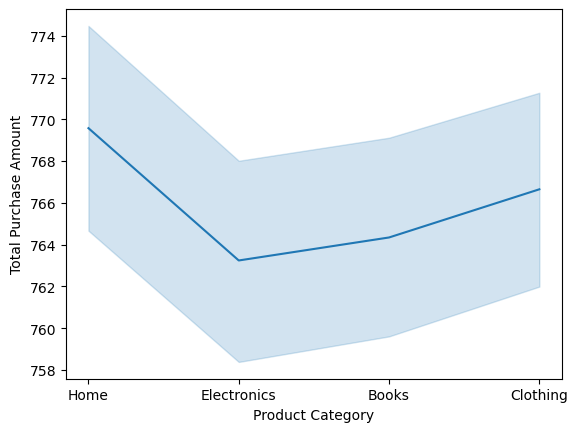

In [10]:
sns.lineplot(data=df, x='Product Category', y='Total Purchase Amount')
plt.show()

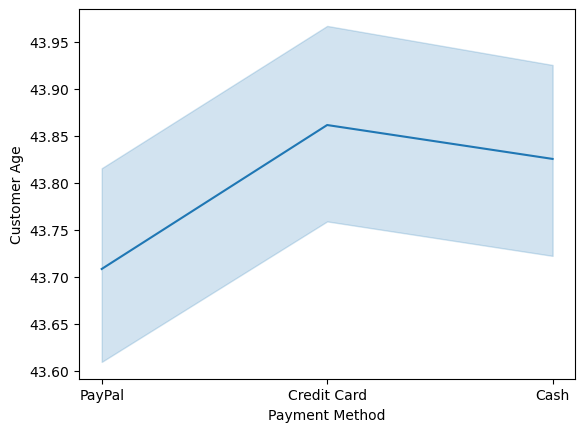

In [11]:
sns.lineplot(data=df, x='Payment Method', y='Customer Age')
plt.show()

In [12]:
##Histplot-Distribution of Total Purchase Amount

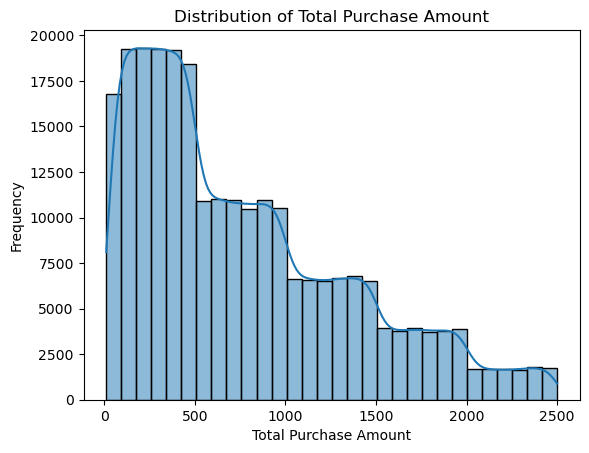

In [13]:
sns.histplot(df['Total Purchase Amount'], bins=30, kde=True)
plt.title('Distribution of Total Purchase Amount')
plt.xlabel('Total Purchase Amount')
plt.ylabel('Frequency')
plt.show()

In [14]:
## Boxplot - Total Purchase Amount by Product Category

C:\Users\User\AppData\Local\Temp\ipykernel_15444\463279141.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Product Category', y='Total Purchase Amount', palette='Set2')


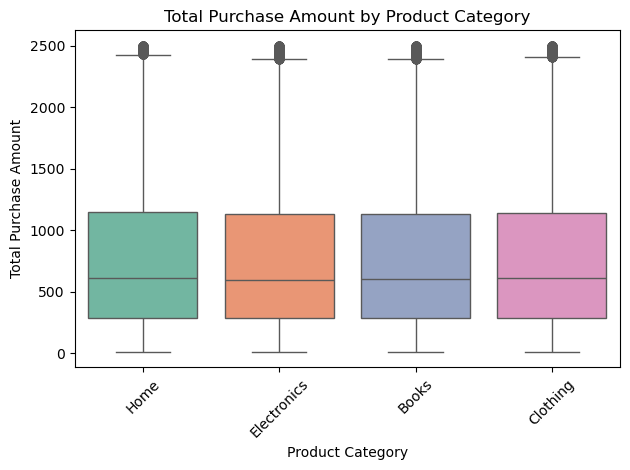

In [15]:
sns.boxplot(data=df, x='Product Category', y='Total Purchase Amount', palette='Set2')
plt.title('Total Purchase Amount by Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
##Detecting outlierin total purchase amount

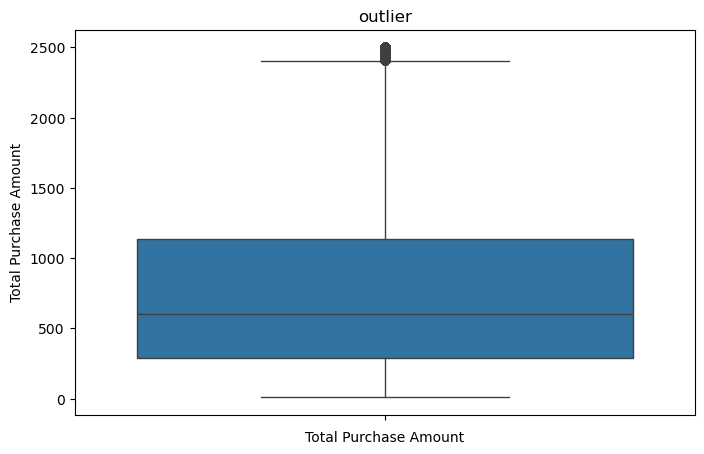

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(df['Total Purchase Amount'])
plt.title("outlier")
plt.xlabel("Total Purchase Amount")
plt.show()

In [18]:
##Countplot - Payment Method Distribution

C:\Users\User\AppData\Local\Temp\ipykernel_15444\2006689436.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Payment Method', palette='pastel')


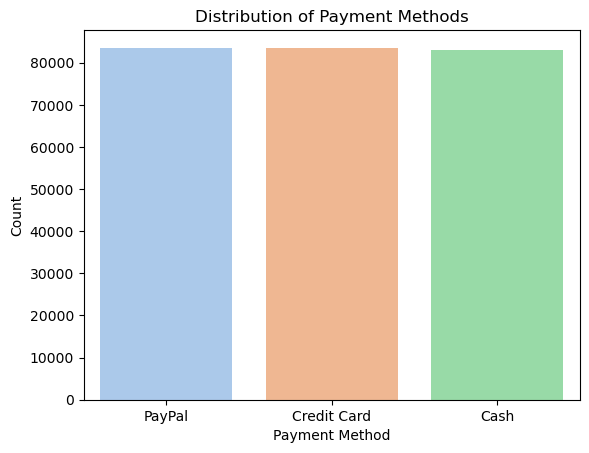

In [19]:
sns.countplot(data=df, x='Payment Method', palette='pastel')
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

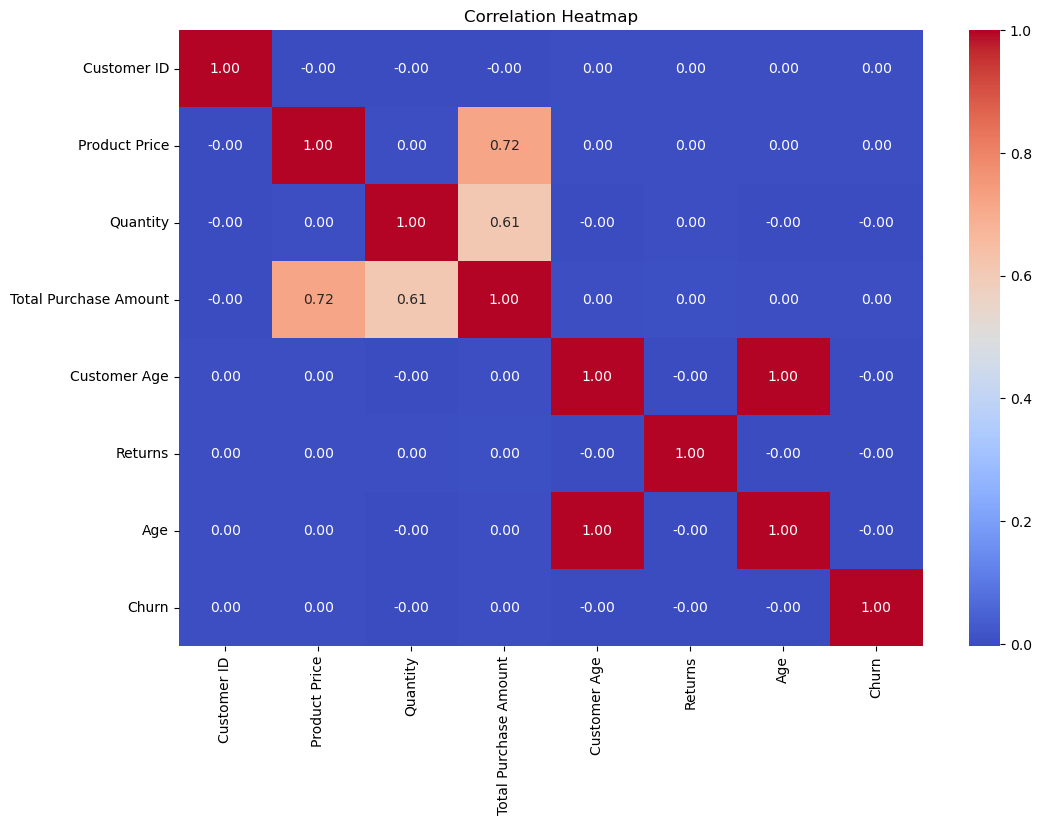

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

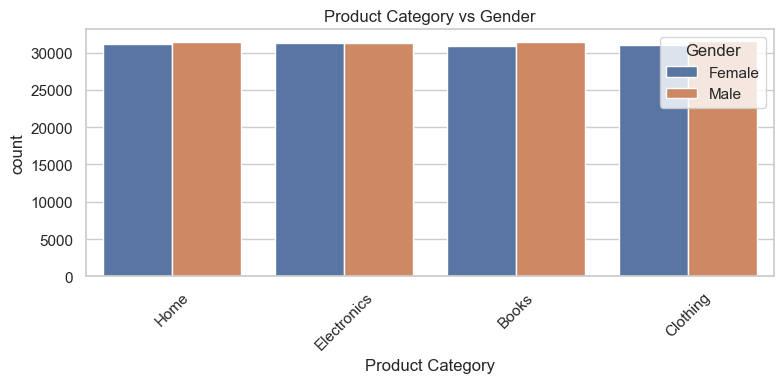

In [154]:
# Strip any extra spaces from column names (important!)
df.columns = df.columns.str.strip()

# Plot
plt.figure(figsize=(8, 4))
sns.countplot(x='Product Category', hue='Gender', data=df)
plt.title('Product Category vs Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
##IQR method for outlier detection

In [24]:
Q1 = df['Total Purchase Amount'].quantile(0.25)
Q3 = df['Total Purchase Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Total Purchase Amount'] < lower_bound) | (df['Total Purchase Amount'] > upper_bound)]
print(f"Number of outliers detected: {len(outliers)}")
print(outliers[['Total Purchase Amount']])

Number of outliers detected: 1940
        Total Purchase Amount
122                      2425
393                      2425
570                      2485
624                      2440
827                      2495
...                       ...
248958                   2460
249249                   2435
249347                   2470
249741                   2495
249978                   2450

[1940 rows x 1 columns]


C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


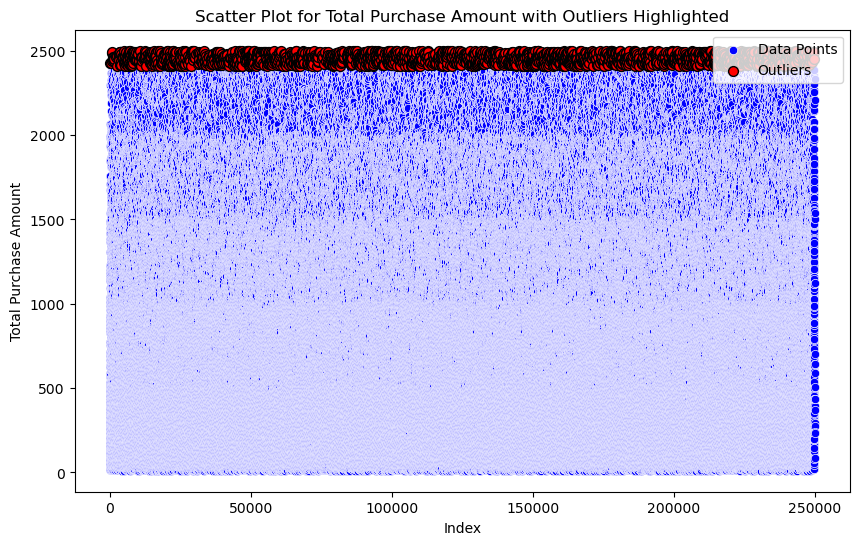

In [25]:
feature = 'Total Purchase Amount'

# Calculate IQR for the feature
Q1 = df[feature].quantile(0.25)
Q3 = df[feature].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outlier indices
outlier_indices = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)].index

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=df[feature], label='Data Points', color='blue')

# Highlight the outliers in red
plt.scatter(outlier_indices, df.loc[outlier_indices, feature], color='red', label='Outliers', s=50, edgecolor='black')

# Adding labels and title
plt.title(f'Scatter Plot for {feature} with Outliers Highlighted')
plt.xlabel('Index')
plt.ylabel(feature)
plt.legend()

# Show the plot
plt.show()

In [26]:
from scipy.stats import zscore
feature = 'Total Purchase Amount'

# Calculate Z-scores
df['z_score'] = zscore(df[feature])

# Set threshold (commonly 3 or -3)
threshold = 3

# Get indices of outliers
outlier_indices = df[(df['z_score'].abs() > threshold)].index
print("Outliers in 'Total Purchase Amount' using Z-score method:")
print(df.loc[outlier_indices, [feature]])

Outliers in 'Total Purchase Amount' using Z-score method:
Empty DataFrame
Columns: [Total Purchase Amount]
Index: []


C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


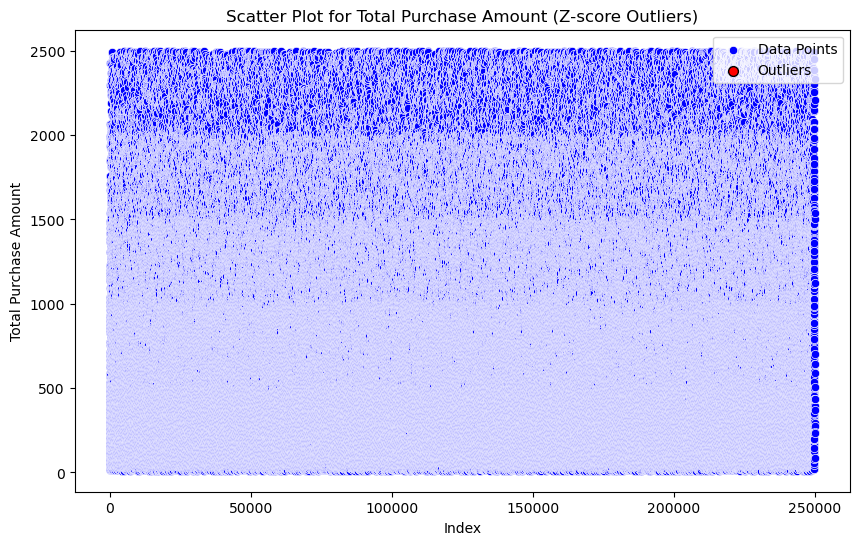

In [27]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=df[feature], label='Data Points', color='blue')

# Highlight Z-score outliers
plt.scatter(outlier_indices, df.loc[outlier_indices, feature],
            color='red', label='Outliers', s=50, edgecolor='black')

# Plot formatting
plt.title(f'Scatter Plot for {feature} (Z-score Outliers)')
plt.xlabel('Index')
plt.ylabel(feature)
plt.legend()

# Show the plot
plt.show()

# Optional: Drop the z_score column after plotting
df.drop(columns=['z_score'], inplace=True)

In [28]:
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,03-05-2023 21:30,Home,177,1,177,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,16-05-2021 13:57,Electronics,174,3,522,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,13-07-2020 06:16,Books,413,1,413,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,17-01-2023 13:14,Electronics,396,3,1188,Cash,31,0.0,John Rivera,31,Female,0
4,44605,01-05-2021 11:29,Books,259,4,1036,PayPal,31,1.0,John Rivera,31,Female,0


In [29]:
df=df.drop(columns=['Customer Name', 'Purchase Date','Age'])

In [30]:
df['Returns'] = df['Returns'].apply(lambda x: 1 if x > 0 else 0)

In [31]:
label_enc = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = label_enc.fit_transform(df[col])
    

In [32]:
## Regressions

In [33]:
##Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [35]:
df.columns

Index(['Customer ID', 'Product Category', 'Product Price', 'Quantity',
       'Total Purchase Amount', 'Payment Method', 'Customer Age', 'Returns',
       'Gender', 'Churn'],
      dtype='object')

In [36]:
x= df.drop(columns=['Total Purchase Amount']) 
y = df['Total Purchase Amount']  # Target

In [37]:
x.head()

,Customer ID,Product Category,Product Price,Quantity,Payment Method,Customer Age,Returns,Gender,Churn
0,44605,3,177,1,2,31,1,0,0
1,44605,2,174,3,2,31,1,0,0
2,44605,0,413,1,1,31,1,0,0
3,44605,2,396,3,0,31,0,0,0
4,44605,0,259,4,2,31,1,0,0


In [38]:
y.head()

0     177
1     522
2     413
3    1188
4    1036
Name: Total Purchase Amount, dtype: int64

In [166]:
# 1. Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


from sklearn.datasets import make_regression
X, y = make_regression(n_samples=200, n_features=5, noise=15, random_state=42)
# -----------------------------------------------------------

# 3. Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Scale X and y for KNN & SVR (not needed for others, but safe for all)
scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_train_scaled = scaler_x.fit_transform(x_train)
x_test_scaled = scaler_x.transform(x_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).ravel()

# 5. Model setup
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "SVR": SVR()
}

# 6. Evaluation
results = []

for name, model in models.items():
    if name in ["KNN Regressor", "SVR"]:
        model.fit(x_train_scaled, y_train_scaled)
        y_pred_scaled = model.predict(x_test_scaled)
        y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
    else:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "R² Score": round(r2, 6),
        "MAE": round(mae, 6),
        "MSE": round(mse, 6),
        "RMSE": round(rmse, 6)
    })

# 7. Show comparison table
results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:")
print(results_df)


Model Performance Comparison:
               Model  R² Score        MAE          MSE       RMSE
0  Linear Regression  0.977973  11.607383   191.381315  13.834064
1      Random Forest  0.900491  22.826666   864.585805  29.403840
2      Decision Tree  0.758852  34.037961  2095.218439  45.773556
3      KNN Regressor  0.803416  31.908676  1708.018324  41.328178
4                SVR  0.910029  19.651879   781.715230  27.959171


In [157]:
# Set plot style

C:\Users\User\AppData\Local\Temp\ipykernel_15444\3806635844.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_df, x="Model", y="R² Score", ax=axs[0, 0], palette="Greens_d")
C:\Users\User\AppData\Local\Temp\ipykernel_15444\3806635844.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_df, x="Model", y="MSE", ax=axs[0, 1], palette="Reds_d")
C:\Users\User\AppData\Local\Temp\ipykernel_15444\3806635844.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_df, x="Model", y="RMSE", ax=axs[1, 0], palette="Bl

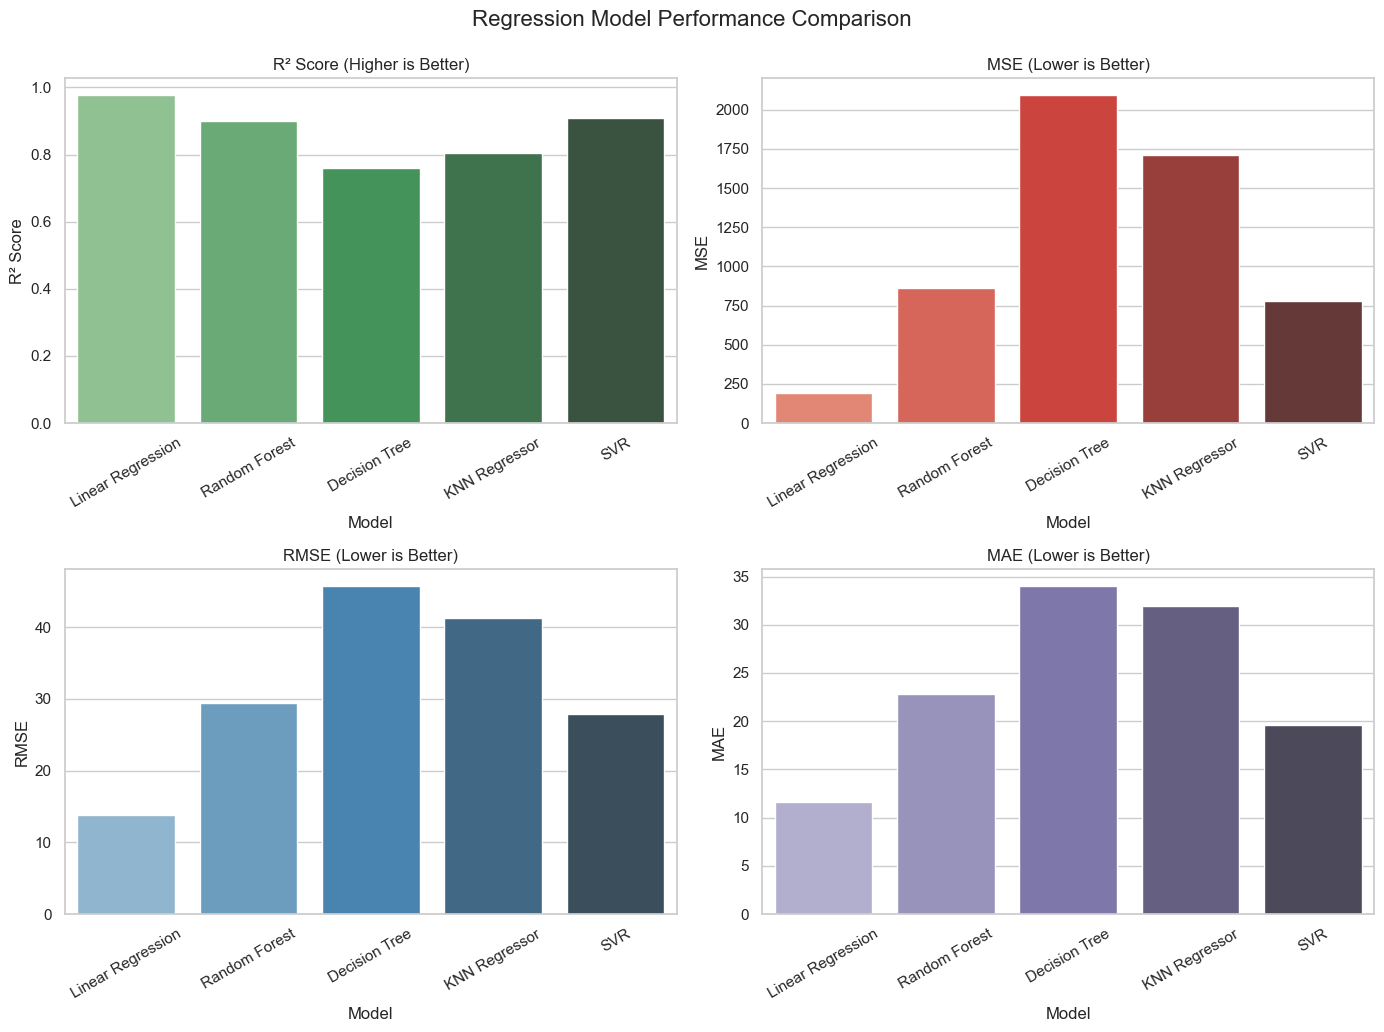

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Your DataFrame
metrics_df = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "Decision Tree", "KNN Regressor", "SVR"],
    "R² Score": [0.977973, 0.900491, 0.758852, 0.803416, 0.910029],
    "MAE": [11.607383, 22.826666, 34.037961, 31.908676, 19.651879],
    "MSE": [191.381315, 864.585805, 2095.218439, 1708.018324, 781.715230],
    "RMSE": [13.834064, 29.403840, 45.773556, 41.328178, 27.959171]
})

# Set seaborn style
sns.set(style="whitegrid")

# Create 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# R² Score
sns.barplot(data=metrics_df, x="Model", y="R² Score", ax=axs[0, 0], palette="Greens_d")
axs[0, 0].set_title("R² Score (Higher is Better)")
axs[0, 0].tick_params(axis='x', rotation=30)

# MSE
sns.barplot(data=metrics_df, x="Model", y="MSE", ax=axs[0, 1], palette="Reds_d")
axs[0, 1].set_title("MSE (Lower is Better)")
axs[0, 1].tick_params(axis='x', rotation=30)

# RMSE
sns.barplot(data=metrics_df, x="Model", y="RMSE", ax=axs[1, 0], palette="Blues_d")
axs[1, 0].set_title("RMSE (Lower is Better)")
axs[1, 0].tick_params(axis='x', rotation=30)

# MAE
sns.barplot(data=metrics_df, x="Model", y="MAE", ax=axs[1, 1], palette="Purples_d")
axs[1, 1].set_title("MAE (Lower is Better)")
axs[1, 1].tick_params(axis='x', rotation=30)

# Adjust layout
plt.tight_layout()
plt.suptitle("Regression Model Performance Comparison", fontsize=16, y=1.03)
plt.show()

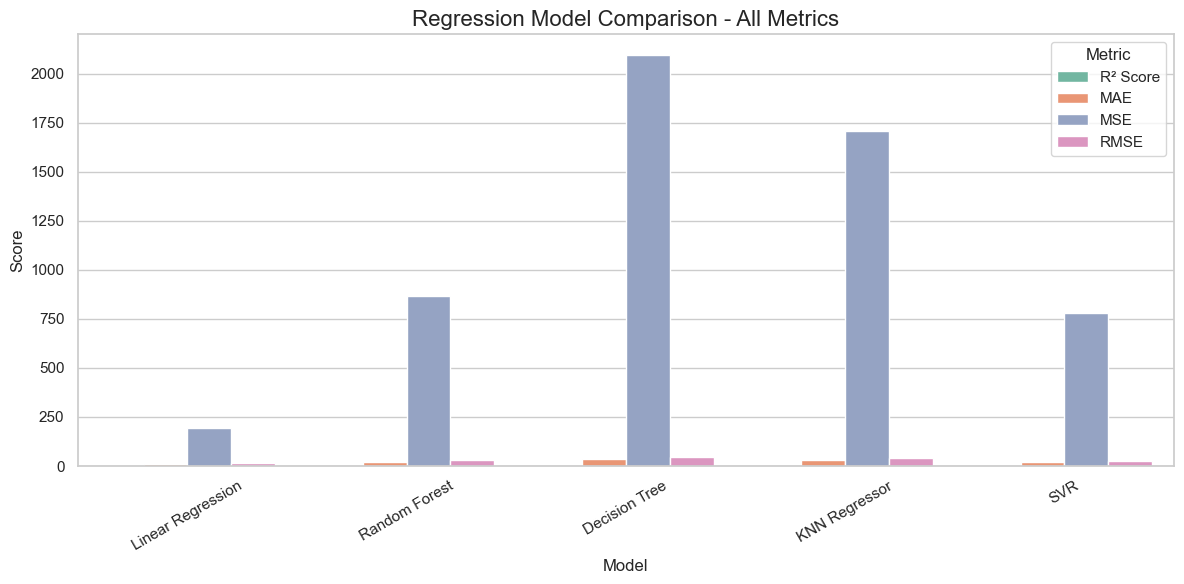

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample metrics (replace with your actual dictionaries)
r2_scores = {
    "Linear Regression": 0.977973,
    "Random Forest": 0.900491,
    "Decision Tree": 0.758852,
    "KNN Regressor": 0.803416,
    "SVR": 0.910029
}
mse_scores = {
    "Linear Regression": 191.381315,
    "Random Forest": 864.585805,
    "Decision Tree": 2095.218439,
    "KNN Regressor": 1708.018324,
    "SVR": 781.715230
}
rmse_scores = {
    "Linear Regression": 13.834064,
    "Random Forest": 29.403840,
    "Decision Tree": 45.773556,
    "KNN Regressor": 41.328178,
    "SVR": 27.959171
}
mae_scores = {
    "Linear Regression": 11.607383,
    "Random Forest": 22.826666,
    "Decision Tree": 34.037961,
    "KNN Regressor": 31.908676,
    "SVR": 19.651879
}

# 1. Create wide-format DataFrame
metrics_df = pd.DataFrame({
    "Model": list(r2_scores.keys()),
    "R² Score": list(r2_scores.values()),
    "MSE": list(mse_scores.values()),
    "RMSE": list(rmse_scores.values()),
    "MAE": list(mae_scores.values())
})

# 2. Convert to long format
metrics_long = metrics_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Optional: control metric order (optional but improves readability)
metric_order = ["R² Score", "MAE", "MSE", "RMSE"]
metrics_long["Metric"] = pd.Categorical(metrics_long["Metric"], categories=metric_order, ordered=True)

# 3. Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=metrics_long, x="Model", y="Score", hue="Metric", palette="Set2")

# 4. Customize appearance
plt.title("Regression Model Comparison - All Metrics", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.xticks(rotation=30)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

In [117]:
##Classification Algorithams

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# 1. Create purchase class using quantile-based binning
df['Purchase_Class'] = pd.qcut(df['Total Purchase Amount'], q=3, labels=['Low', 'Medium', 'High'])

# 2. Feature and target separation
X = df.drop(['Total Purchase Amount', 'Purchase_Class'], axis=1)
y = df['Purchase_Class']

# 3. Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 5. Feature scaling (important for KNN, SVC)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6. Define classification models
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVC": SVC()
}

# 7. Train, predict, and evaluate
accuracy_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_results[name] = acc
    print(f"\n {name}")
    print("Accuracy:", round(acc, 3))
    print(classification_report(y_test, y_pred, target_names=le.classes_))




 Random Forest
Accuracy: 1.0
              precision    recall  f1-score   support

        High       1.00      1.00      1.00     16706
         Low       1.00      1.00      1.00     16535
      Medium       1.00      1.00      1.00     16759

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000


 Logistic Regression
Accuracy: 0.872
              precision    recall  f1-score   support

        High       0.94      0.94      0.94     16706
         Low       0.87      0.86      0.87     16535
      Medium       0.81      0.81      0.81     16759

    accuracy                           0.87     50000
   macro avg       0.87      0.87      0.87     50000
weighted avg       0.87      0.87      0.87     50000


 KNN
Accuracy: 0.936
              precision    recall  f1-score   support

        High       0.96      0.95      0.96     16706
         Low       0.95      0.95      

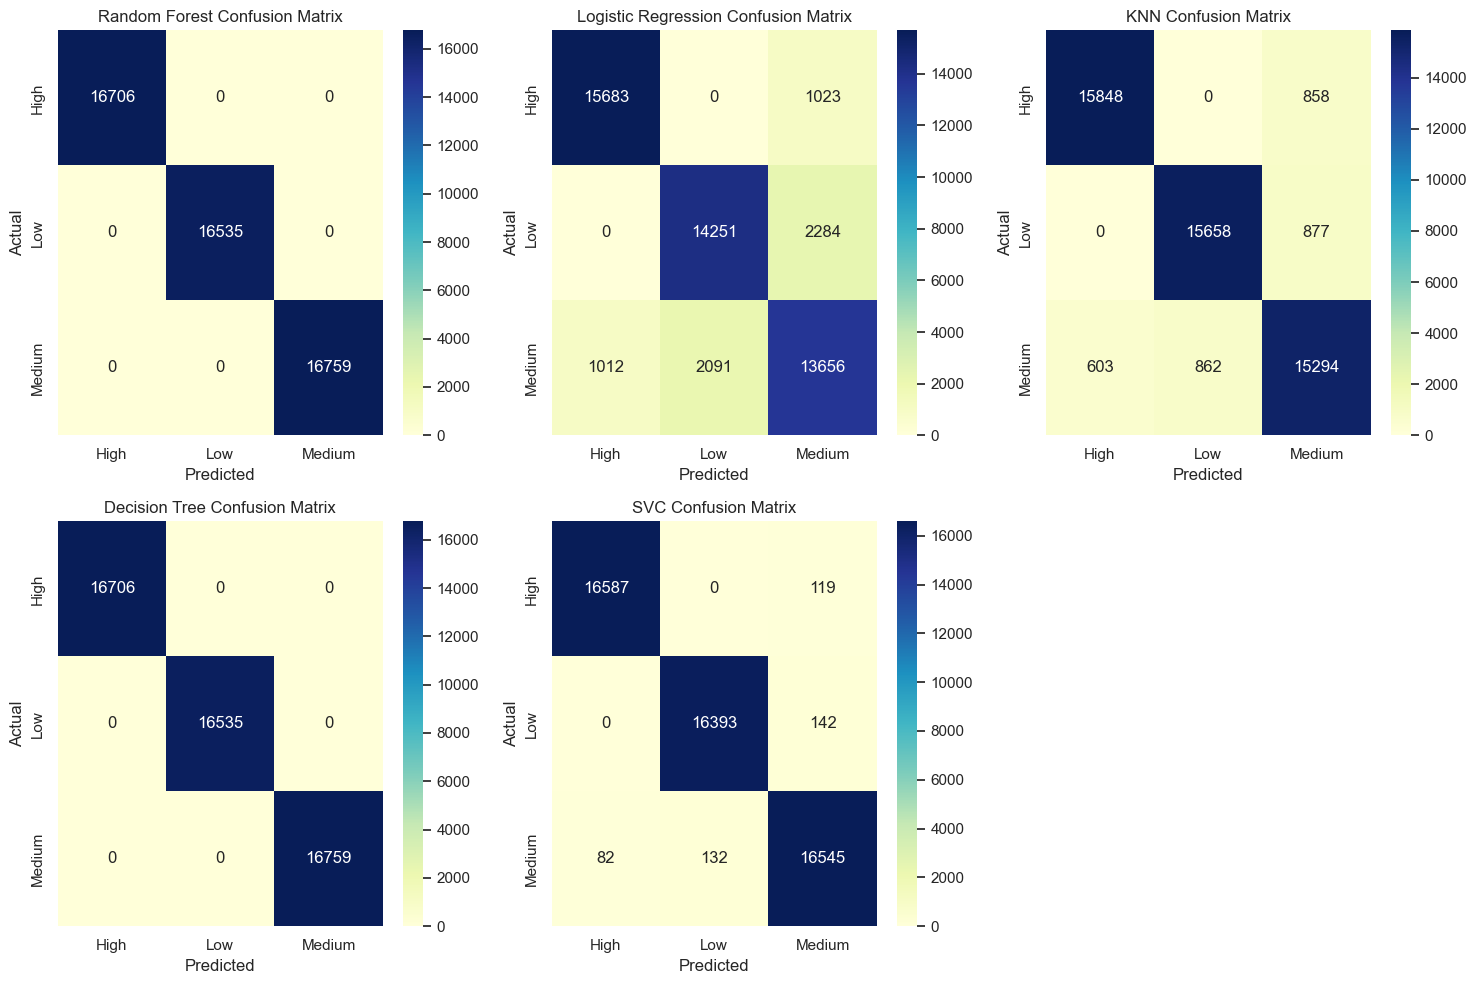

In [121]:
from sklearn.metrics import confusion_matrix
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', 
                xticklabels=le.classes_, yticklabels=le.classes_, ax=axes[idx])
    
    axes[idx].set_title(f"{name} Confusion Matrix")
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

# Hide any unused subplot
if len(models) < len(axes):
    for j in range(len(models), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_15444\1877030264.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracy_results.keys()), y=list(accuracy_results.values()), palette='Set3')


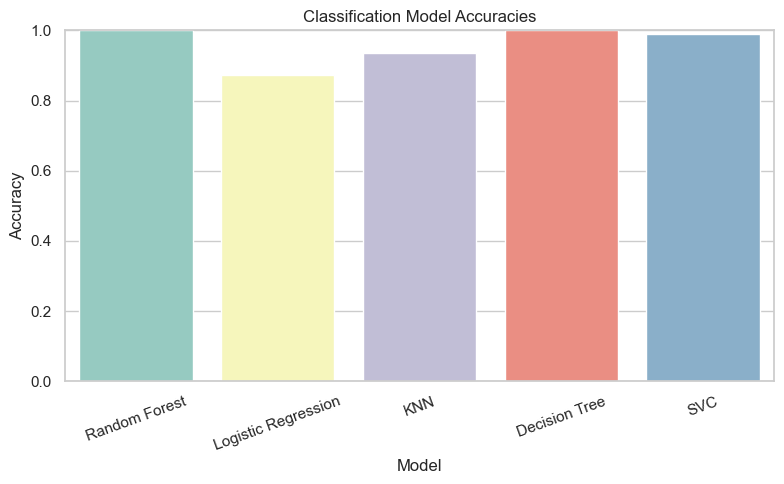

In [122]:
# 8. Plot accuracies
plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracy_results.keys()), y=list(accuracy_results.values()), palette='Set3')
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.title("Classification Model Accuracies")
plt.xticks(rotation=20)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [127]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    })
    

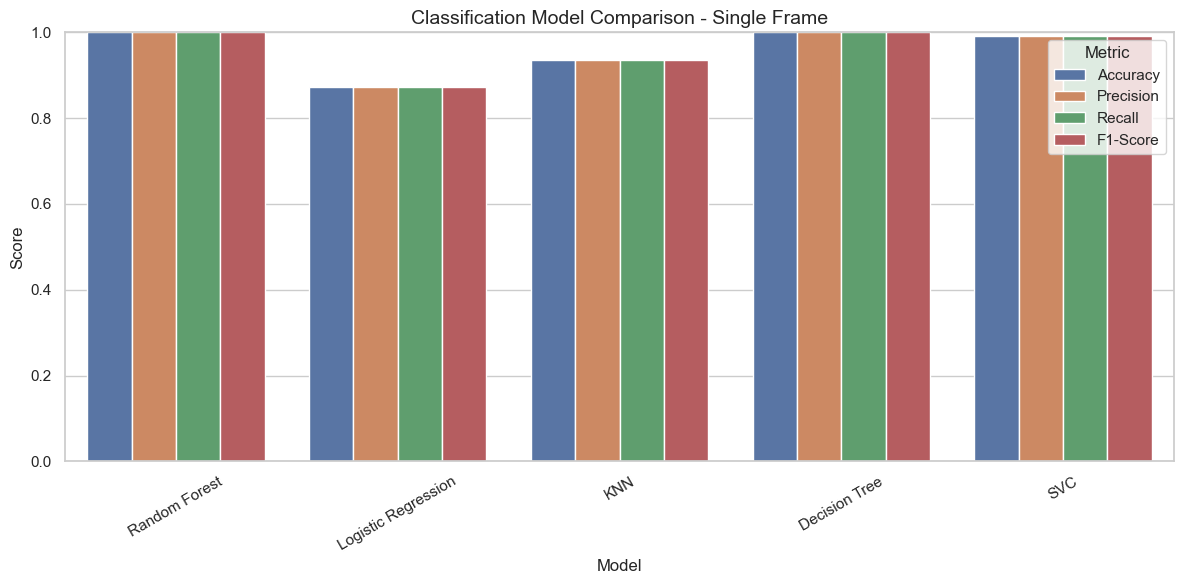

In [128]:
results_df = pd.DataFrame(results)

# Melt to long format for seaborn
long_df = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=long_df, x="Model", y="Score", hue="Metric")

# Customizations
plt.title("Classification Model Comparison - Single Frame", fontsize=14)
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import numpy as np

# 1. Drop irrelevant or duplicate columns
df_model = df.drop(['Customer ID', 'Customer Name', 'Purchase Date', 'Total Purchase Amount'], axis=1)

# 2. Identify categorical columns (object type)
cat_cols = df_model.select_dtypes(include=['object']).columns.tolist()

# 3. Encode all categorical columns with LabelEncoder
for col in cat_cols:
    le_col = LabelEncoder()
    # Fill NaNs with a placeholder string before encoding if any NaN exists in categorical cols
    df_model[col] = df_model[col].fillna('Missing')
    df_model[col] = le_col.fit_transform(df_model[col])

# 4. Separate features and target
X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

# 5. Encode target if not numeric
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)

# 6. Impute missing values in features (numeric columns)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# 7. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# 8. Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 9. Define models
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVC": SVC()
}

# 10. Train and evaluate
accuracy_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_results[name] = acc
    print(f"\n{name}")
    print("Accuracy:", round(acc, 3))
    print(classification_report(y_test, y_pred))


Random Forest
Accuracy: 0.742
              precision    recall  f1-score   support

           0       0.80      0.90      0.85     40016
           1       0.21      0.10      0.14      9984

    accuracy                           0.74     50000
   macro avg       0.50      0.50      0.49     50000
weighted avg       0.68      0.74      0.71     50000


Logistic Regression
Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     40016
           1       0.00      0.00      0.00      9984

    accuracy                           0.80     50000
   macro avg       0.40      0.50      0.44     50000
weighted avg       0.64      0.80      0.71     50000



C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



KNN
Accuracy: 0.766
              precision    recall  f1-score   support

           0       0.80      0.94      0.87     40016
           1       0.21      0.06      0.10      9984

    accuracy                           0.77     50000
   macro avg       0.51      0.50      0.48     50000
weighted avg       0.68      0.77      0.71     50000


Decision Tree
Accuracy: 0.666
              precision    recall  f1-score   support

           0       0.80      0.78      0.79     40016
           1       0.20      0.22      0.21      9984

    accuracy                           0.67     50000
   macro avg       0.50      0.50      0.50     50000
weighted avg       0.68      0.67      0.67     50000


SVC
Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     40016
           1       0.00      0.00      0.00      9984

    accuracy                           0.80     50000
   macro avg       0.40      0.50      0.44     50000
wei

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


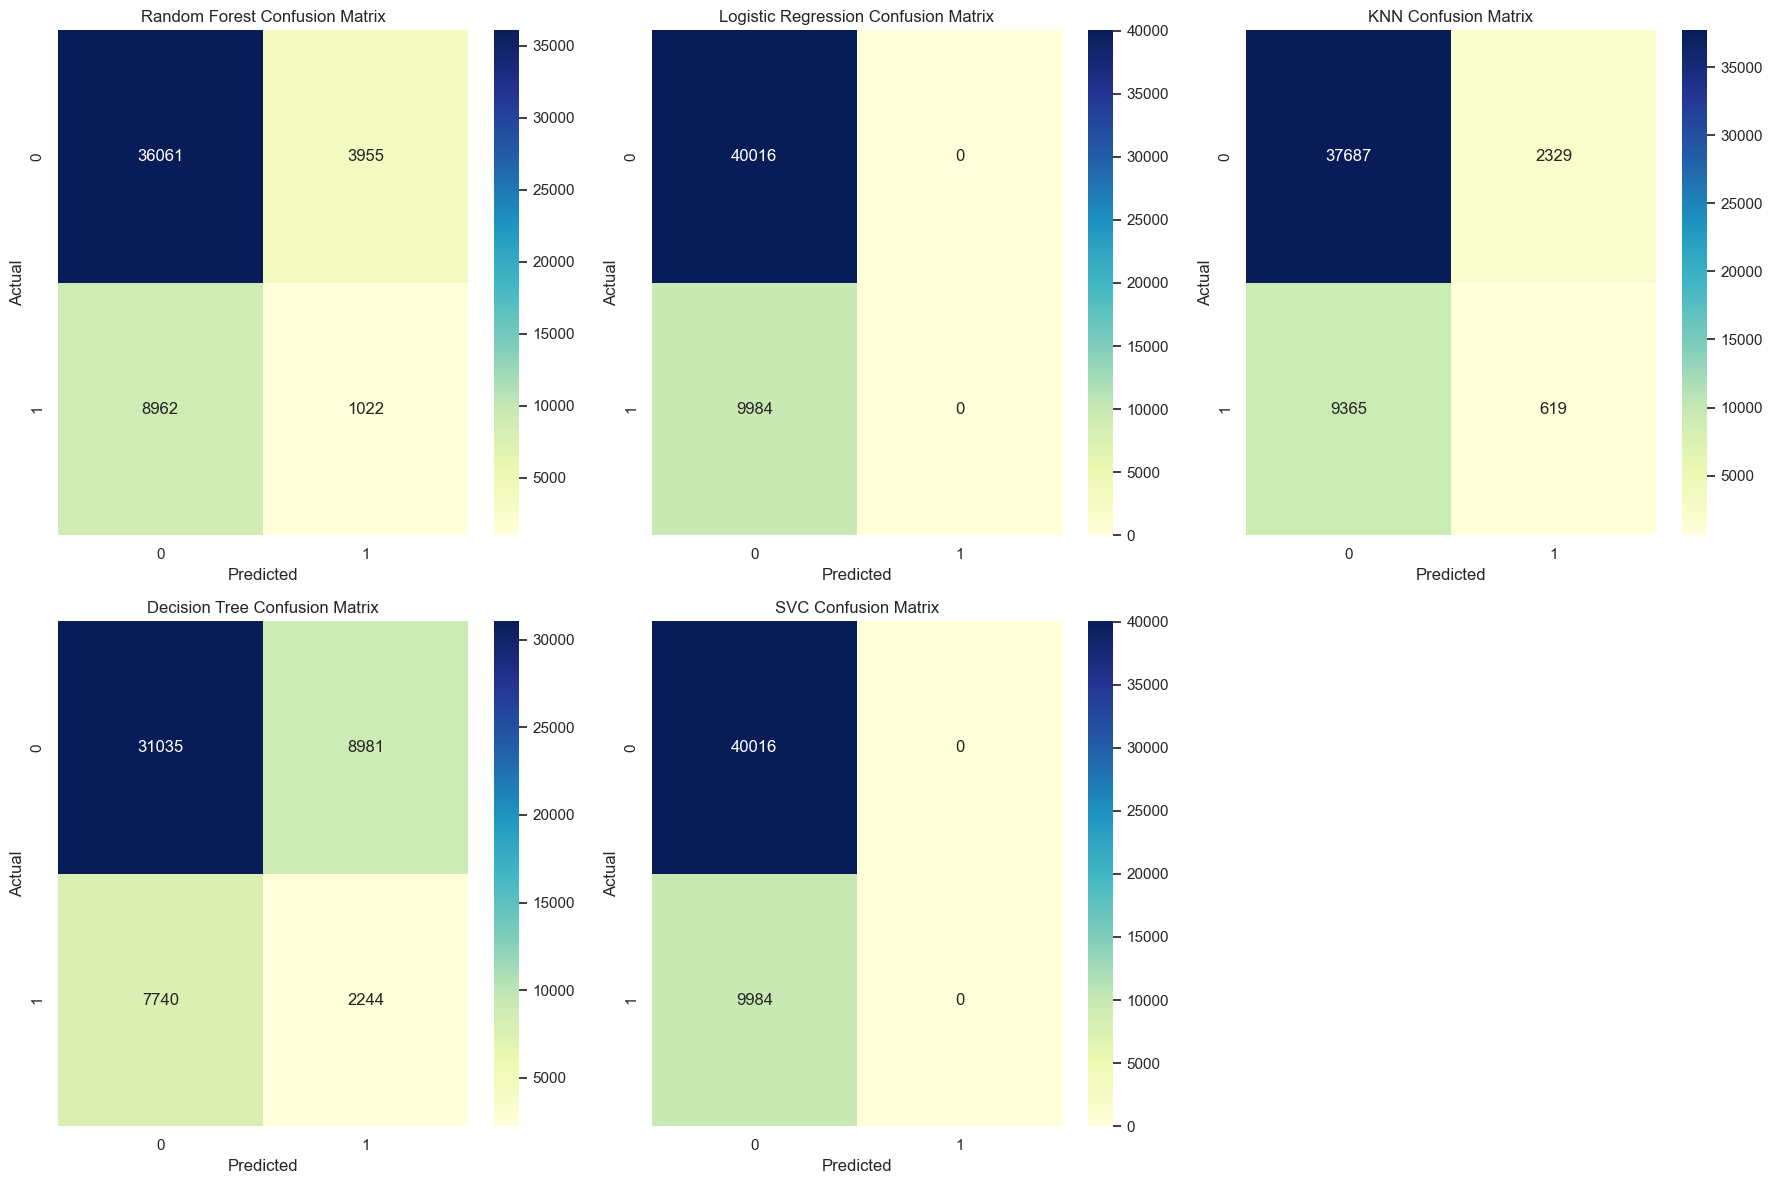

In [141]:
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# If you encoded y with LabelEncoder, get class names from it. Otherwise, use ['0', '1'] or similar
class_names = ['0', '1']  # default fallback

# If you have LabelEncoder for target, replace this with its classes_ attribute:
# e.g., class_names = le_target.classes_  (if you have le_target from final code)
# For safety, you can add this in your code:
try:
    class_names = le_target.classes_
except NameError:
    pass

for idx, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
                xticklabels=class_names, yticklabels=class_names, ax=axes[idx])
    
    axes[idx].set_title(f"{name} Confusion Matrix")
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

# Remove unused subplots if models < axes
for j in range(len(models), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

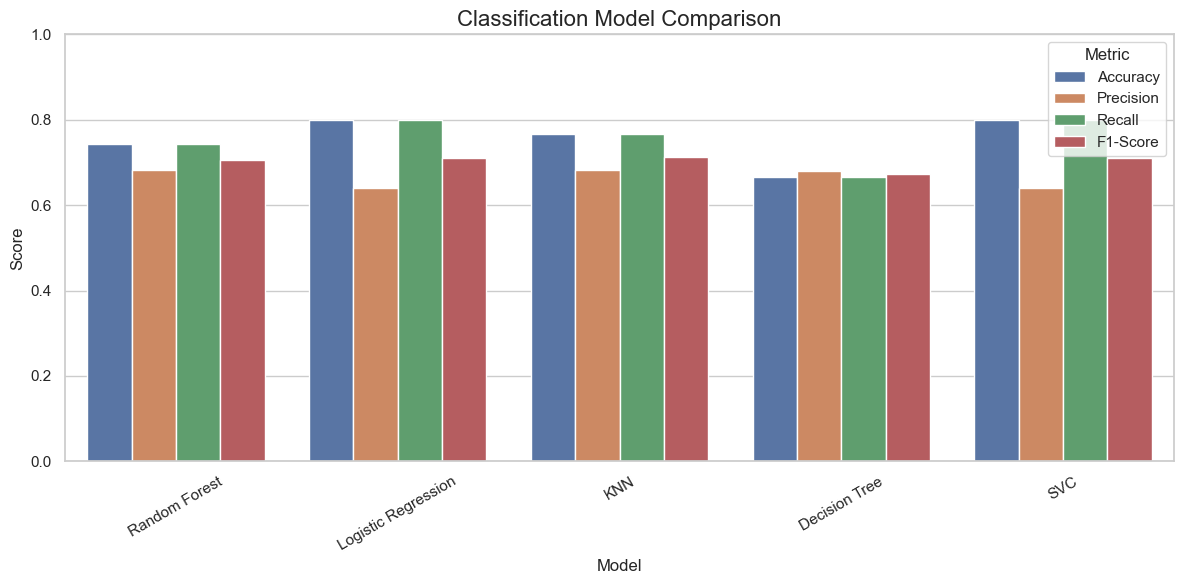

In [142]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    })

# Create results DataFrame
results_df = pd.DataFrame(results)

# Convert to long format for Seaborn barplot
long_df = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=long_df, x="Model", y="Score", hue="Metric")

# Customizations
plt.title("Classification Model Comparison", fontsize=16)
plt.ylabel("Score")
plt.xlabel("Model")
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()